In [6]:
import warnings
warnings.filterwarnings('ignore')

import yfinance as yf

# Tickers and date range
tickers = ['AAPL', 'MSFT', 'GOOGL', 'JPM', 'V']
start_date = '2020-01-01'
end_date = '2025-09-24' 


data = yf.download(tickers, start=start_date, end=end_date)['Close']


data.to_csv('stock_prices.csv')

print("Data saved successfully to stock_prices.csv")

[*********************100%***********************]  5 of 5 completed

Data saved successfully to stock_prices.csv


In [7]:
import pandas as pd
portfolio_data= pd.read_csv("stock_prices.csv", index_col='Date', parse_dates=True)
display(portfolio_data)

,AAPL,GOOGL,JPM,MSFT,V
Date,,,,,
2020-01-02,72.538528,67.965225,120.154716,152.791183,183.549042
2020-01-03,71.833298,67.609680,118.569069,150.888580,182.089294
2020-01-06,72.405685,69.411766,118.474808,151.278610,181.695511
2020-01-07,72.065140,69.277679,116.460648,149.899307,181.215347
2020-01-08,73.224403,69.770790,117.369164,152.286942,184.317352
...,...,...,...,...,...
2025-09-17,238.990005,249.529999,311.750000,510.019989,346.200012
2025-09-18,237.880005,252.029999,313.230011,508.450012,338.179993
2025-09-19,245.500000,254.720001,314.779999,517.929993,341.609985


In [8]:
import numpy as np
daily_returns = np.log(portfolio_data / portfolio_data.shift(1))
expected_annual_returns = daily_returns.mean() * 252
annual_cov_matrix = daily_returns.cov() * 252
print (annual_cov_matrix)

           AAPL     GOOGL       JPM      MSFT         V
AAPL   0.104175  0.066653  0.043921  0.069578  0.051123
GOOGL  0.066653  0.106470  0.042470  0.070379  0.046792
JPM    0.043921  0.042470  0.100596  0.041458  0.053941
MSFT   0.069578  0.070379  0.041458  0.089815  0.048335
V      0.051123  0.046792  0.053941  0.048335  0.074952


In [9]:
def portfolio_performance(weights, expected_returns, annual_cov_matrix, risk_free_rate):
    portfolio_return = np.sum(expected_returns * weights)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(annual_cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    return -sharpe_ratio

In [10]:
from scipy.optimize import minimize

# Each weight between 0 and 1
num_assets = len(expected_annual_returns)
bounds = tuple((0, 0.5) for _ in range(num_assets))

# Sum of weights is 1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

In [11]:

    num_assets = len(expected_annual_returns)
    initial_weights = np.array(num_assets * [1. / num_assets])
    print(initial_weights)
    
    # We will assume the risk free rate is 0.03%
    risk_free_rate = 0.03
    
    
    result = minimize( fun=portfolio_performance,x0=initial_weights, args=(expected_annual_returns, annual_cov_matrix, risk_free_rate),method='SLSQP',
                      bounds=bounds,
                      constraints=constraints
    )

[0.2 0.2 0.2 0.2 0.2]


In [12]:
# Extract the optimal weights from the result
optimal_weights = result.x

# Print the optimal allocation for each stock
print("Optimal Portfolio Allocation:")
for ticker, weight in zip(portfolio_data.columns, optimal_weights):
    print(f"- {ticker}: {weight*100:.2f}%")

# Calculate and display the performance of the optimal portfolio
optimal_return = np.sum(expected_annual_returns * optimal_weights)
optimal_volatility = np.sqrt(np.dot(optimal_weights.T, np.dot(annual_cov_matrix, optimal_weights)))
optimal_sharpe_ratio = (optimal_return - risk_free_rate) / optimal_volatility

print("\n--- Optimal Portfolio Performance ---")
print(f"Expected Annual Return: {optimal_return*100:.2f}%")
print(f"Annual Volatility (Risk): {optimal_volatility*100:.2f}%")
print(f"Sharpe Ratio: {optimal_sharpe_ratio:.2f}")

Optimal Portfolio Allocation:
- AAPL: 25.62%
- GOOGL: 33.67%
- JPM: 17.64%
- MSFT: 23.07%
- V: 0.00%

--- Optimal Portfolio Performance ---
Expected Annual Return: 21.18%
Annual Volatility (Risk): 26.43%
Sharpe Ratio: 0.69


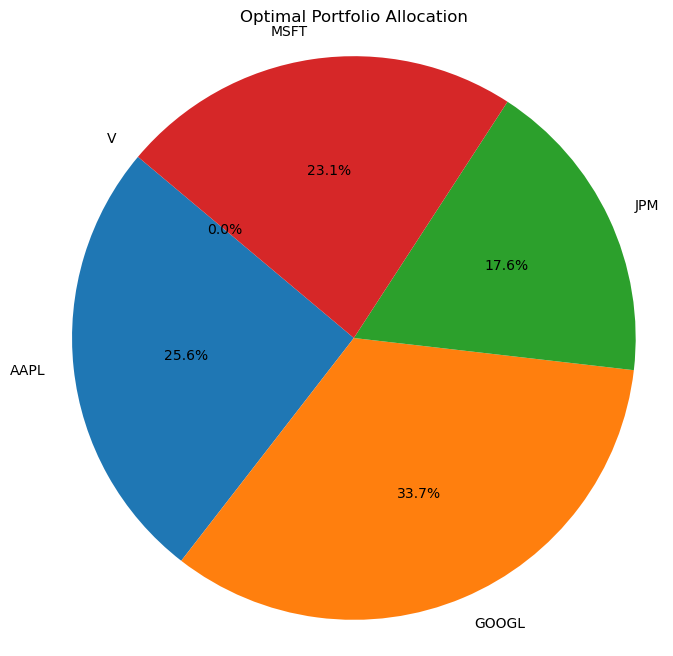

In [13]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 8))
plt.pie(optimal_weights, labels=portfolio_data.columns, autopct='%1.1f%%', startangle=140)
plt.title('Optimal Portfolio Allocation')
plt.axis('equal')  


plt.savefig('optimal_portfolio_pie_chart.png')